# Analaysis of ATC/OTC patches:

## 1. Take all important patches with overlap > `OVERLAP_THRESHOLD` from ATC.

In [1]:
import pandas as pd
from datasets import Dataset, load_dataset

INPUTS = ['/home/jovyan/data/proteins_m1/export_ATCaseOTCase_10.csv',
          '/home/jovyan/data/proteins_m1/export_ATCaseOTCase_20.csv',
          '/home/jovyan/data/proteins_m1/export_ATCaseOTCase_40.csv']
OUTPUT = '/home/jovyan/data/analysis/atc_otc.csv'

OVERLAP_THRESHOLD = 0.5

In [2]:
pd.options.display.max_colwidth = 500

atc_patches = []

for csv_input in INPUTS:
    df_tmp = pd.read_csv(csv_input)
    print(f'Patches of size={csv_input.split("_")[3].replace(".csv", "")}: {len(df_tmp)} ', end='')
    df_tmp = df_tmp.loc[df_tmp['overlap_pred'] >= OVERLAP_THRESHOLD]
    print(f'({len(df_tmp)} with reasonable overlap)')
    atc_patches += df_tmp['patch'].tolist()
    del(df_tmp)
    
print(f'All final patches: {len(atc_patches)} (distinct: {len(set(atc_patches))})')
atc_patches = list(set(atc_patches))

Patches of size=10: 445 (379 with reasonable overlap)
Patches of size=20: 445 (352 with reasonable overlap)
Patches of size=40: 445 (199 with reasonable overlap)
All final patches: 930 (distinct: 785)


## 2. Take all OTC samples - from test *(then from train as well?)*.

In [3]:
dss = load_dataset('EvaKlimentova/knots_AF')
dss = dss['test']
df = pd.DataFrame(dss)
df

Using custom data configuration EvaKlimentova--knots_AF-293560de9ceccb3f
Found cached dataset parquet (/home/jovyan/.cache/huggingface/datasets/EvaKlimentova___parquet/EvaKlimentova--knots_AF-293560de9ceccb3f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length,Domain_architecture,InterPro,Max_Topology,Max Freq,Knot Core,label,FamilyName
0,A0A0C1J7Q4,4,80.50,1,501,MIDALSEFHFIRAAWLLLLAPIGLLWWLIRPKPSKQANSASGIAPHLAEALQLGADDTRRIYPIDVAMIAAILIALAAAGPTWSRSPNPLVADTAPLVIALKVTDSMEEADLPPSRLERAKFKITDLINARADARTALIAYAGTPHRVAPLTEDANILRPLLEGLTPAVMPKPGDAASDALSVAETILSDSETPGAILFVLDDIDPSQVPGIEAATAPVFVLTMRPNGERVAQLDGLGNTTVVPFSEDDRDIARLQRVIHSAYSAALDDDDRLDWQDRGWILAWPAALLSLLWFRKGWVIRWAFLALLLIPPSGPAFAGGWRDWFLTPDQQGQIAMNQKRYADAADLFKDPYHKGYAHLKAGQYPEAAAIFAELDTPDAAFAEGMARIRNREYRPAISAFETALERQPDWPEAQHNLEVANAILAFVETTREQSDTGEEAGIGADDTVFDNEAGRGEDTTVQAPTDGAQALSADQWISTIDTDMQDFLRNRFLLEN...,501.0,PF13519;,IPR011990;IPR019734;IPR002035;IPR036465;,None,NaN,None,0,VIT
1,A0A3D9H7F7,4,95.06,1,168,MQLTHYNSSFKKQKHSITVICDNVTNAPNIGSLFRIADAFGIEQLIFCGSDIPLGKRMTKTSRSTEKYVNHSVEEDIESRIEILKASGFYLIALEITEKSQSLSEFKLQTNQPIALILGDENFGISDTILNQADAIIHINMYGNNSSMNVVQATGIALYEITKQLNAD,168.0,PF00588;,IPR029028;IPR004441;IPR001537;IPR029026;,3_1,0.834,"(93, 137)",1,SPOUT
2,A0A1J4RNW5,4,93.69,1,142,MKILAVGKIKESCILEGMHEYLKRMKGRIEIVEIKDSTKEKESIEITRKLEKLDRFLTVALDEHGKEMTSLEFSEFIKNNFNKNLCFIVGGPDGLDKSILEGVDHTLALSRMTFTHEMARLLLVEQLYRAFSIIDGKKYHRG,142.0,PF02590;,IPR029028;IPR003742;IPR029026;,3_1,0.716,"(60, 107)",1,SPOUT
3,A0A7R5L258,4,83.19,1,423,MWGVGGQGVLPALLLLPGLCAGFNIDVENPRVFRGPPESQFGYRVLQWGGDGDRGLLVGAPWDGDGQGDVYKCGVGPQNSSCAKANLGDTAPWLRGSAGHLGMTLVGSKDGGFVACAPLWSQECGTSVFSSGRCVRLDEELRLVETVAPTAQRCSTYMDIVLVLDGSNSIYPWEEVQDFLGNILGRFFIGPGQTQVGVLQYGEEVVQEWALGQHPTAQALLEAARNLTRQEGRETRTAMAIRQACAESFSAERGGRSGAARLLLVVTDGESHDGEELPAALAECEKRNITRYAIAVLGHYLRRQQDPEDFIREIKFIASDPDEKYFFNVTDEAALNDIVDALGDRIFSLEGTREDNESAFELEMSQIGFSIHLLEDGILFGMVGAYDWEGGVLEESRRGRIIPPREAFQGEFPLELKNHAAYL,423.0,PF00092;,IPR013519;IPR028994;IPR002035;IPR036465;,None,NaN,None,0,VIT
4,A0A842KII6,4,94.88,1,344,MKVIVYRYGHRIERDKRMTTHVALAARAFGADGIFVDRKDEELEKRIRKVIERFGGNFFIESGIDWKKLIKEWNGKIIHLTMYGEKIENVIEEIKKFENILVIVGSEKVPGEFYEISDYNVAIGNQPHSEVSSIAIFLHMLNGGEWMKRNFGGVIKIIPSKKGKKLSYNYLKILEKEGCSKDVIEHCKKVRDLAIKIAEKIAENGINLDMEAIEAGAILHDVGRAKRNDLMHVVEGVKIAKKYGLPKKVVAIIERHVGSGIDEEDAERLGLPKKDYIPKSIEEEIVSHADNLTSNGYRNIEEAINEFKKFGDKQVKKLIETHEKLSKFAGLDIDRIVDGLKPSK,344.0,PF01966;PF01994;,IPR029028;IPR003607;IPR006674;IPR006675;IPR029026;IPR002845;,3_1,0.900,"(79, 121)",1,SPOUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39407,A0A672HYG6,4,78.62,1,774,SKQPCLCGGNISGCDCVSPSVPLKSIEVELEVRDHVATVVSTLNYQNKEDKPIEAVFVFPLPGDAAVCHFSAKMGQKEIVAEVKEKQEAREEYDDALSSGQQAFLLEESDQSPDVFSMRVGCLPPGESASIRLEYVTELAVQADEGLRFCLPAVLNPRYTPQGRKTSEKLIHPGELCSSLSGSLQSVFSARVSSPRPISKVESSCSLDPLQFLNTDQTQATVKLGAGHKFDRDVEVLIYYKDAHQPTAVVEAGQASAKPGTLMGDPVVMVSLFPEFPQSAKSSVASCGEFVFLVDRSGSMDFPMNNKDRNQTRIISARETLLLLLKSLPMGCYFNIYSFGSSFEHIFPKSVKYGQKTMEEALKRVGTMVADLGGTEILEPLKRIYKQPCIPSHPRQLFVFTDGEVGNTKEVIDLVKKNSGSHRCFSFGIGEGASSALINGLAKEGGGHAQFITGSDRMQPKVMQSLRFALQPAVVDISITWDLPKDVSVTVLSPPI...,774.0,PF08487;PF13768;,IPR013694;IPR002035;IPR036465;,6_3,0.812,"(60, 622)",1,VIT
39408,A0A1F9XMW4,4,77.31,1,578,MELFRYPVELFWLAAGFAALCIFYFKARAASERVALELMDLRQLIRLSGANAIARKKTRDWLYLAALAFLLAAAGGPQWGVEMAPVTDLNGSLVVAVDASASMRAKDLKPSRMENAKLMLAALADKFQDYRVGIIAFSGDAYVQCPLTTDSDAIKYFLSYLAPGILPAPGTDIAAAITEAERMLGKYSGQKVLVLITDGEDLEEKVDEALNSAAAVNLKIFTVGMGKAEGEVIPVSDQGGNFIEYKKDSAGKTVVTKLNEGILLKIAQKTGAEYIRYGGNPETTAEEIRATVARIALSKTKGFGKASYKNRYQAPLFIAFLLFLIELMFMEKGFSAPKLLTRLFFRFRKAPVSFLLAALALSAVVPGKALAASPENLARQGNTAYDKKDFPKAYEYYSKALEKKPKNSRVLFNRGAAFYRMEDYAKAAEDFEEAGKTAKIKSMAGYNAGNAYFKLSDFPKAIEKYREAILADPGNKDARYNLQRALEEQKKNRNKC...,578.0,PF07719;PF13519;,IPR011990;IPR013105;IPR019734;IPR002035;IPR036465;,None,NaN,None,0,VIT
39409,A0A2W5N1I1,4,93.44,1,297,MKHFLELSDIPAATLREILDNAHALKKDKYAPPQILEGLSLAMMFDKRSTRTRVSFEVAMKQLGGHTIVMGMNEMQIGGAESIEDTAKVLSRFVDAVMIRISDQDTLYELAKHAGVPVINGMTDYSHPCQIMADLMTIEEKLGSIKGKKIAWFGDYNNVARTFVQASKKFEFDFIVAIPPALQMKADMNAVSTADPAFAAKDADVLVTDTWVSMGQEGKDIEQFRPYQVNAKLMELAKPHAIFMHCMPIHQGEEVADEVLKSSASVIYDEAENRLHAQKAILAYCLKESGVRIKRAA,297.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR006131;IPR00

In [4]:
df = df.loc[df['FamilyName'] == 'ATCase/OTCase']
df = df.loc[df['label'] == 0]
df

,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length,Domain_architecture,InterPro,Max_Topology,Max Freq,Knot Core,label,FamilyName
21,A0A371KX32,4,96.12,1,163,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,163.0,PF00185;,IPR006130;IPR036901;IPR006131;IPR002292;,None,NaN,None,0,ATCase/OTCase
29,A0A540VL62,4,91.00,1,330,MVDSNAKVTLKDVGQQPGHNRDNGFYGQDIISVSQFDRTRLEYIFNVAHEMRVLVERFGSADLLQGKILANLFYEPSTRTSSSFMAAMLRLGGQVIPINNVQYSSVTKGESLPDTVRTLECYADVIVLRHPEVGSAATAARYASKPVINAGDGVGEHPTQALLDHFTIVEELGGVDGLKVAMVGDLKYGRTVHSLTKLLTNYDVEFVFVSPDILRMPEDVLDVVRASGHRFTVTEDVHDVIGEVDVLYVTRVQKERFSDLAEYDRVKDQYVVDPELMQRAKERMIVMHPLPRVNEISYAVDDDPRAAYFRQMRNGMYIRMALLAAVLGRA,330.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR002082;IPR006131;,None,NaN,None,0,ATCase/OTCase
39,A0A355W0X2,4,95.94,1,327,MDLKGRDFLKLLDFTPEEIEYLLNLAADLKDKKKKGIPVDTLRGKNVALIFEKTSTRTRCAFEVAAHDLGMGTTYLDPTGSQIGKKESIADTARVLAGMFEGIEYRGFGQDIVEELAKYSKVPVWNGLTNEFHPTQMLADLLTIREHFGHLKGIRMTYMGDARYNMGNSLMVACAKMGMHFTACTTAKYFPAKELVAECEAIAAQTGGSITLTEDVKAGTKDVDVIYTDVWVSMGEPDEVWTERIKELSPYQVNKAVMDNAGEQAIFMHCLPAFHDLKTKIGAQMGERFGITEMEVTDEVFESGQSLVFEEAENRMHTIKAVMAATL,327.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR006131;IPR002292;IPR024904;,None,NaN,None,0,ATCase/OTCase
40,A0A4R6R6L5,4,93.88,1,311,MTTPRHFLDLTDLDGATLRGILDGAAAIKAELKASGRGTRRGEGPLAGKVLAMVFERPSTRTRVSFDVGMRQLGGETLMLTGDEMQLGRGETIADTARVLSRYVDAVMIRILDHAALAELAANASVPVINGLTRLSHPCQIMADVMTFEEHRGPIAGRKVAWTGDSNNVLASWIHASARFGFEMRVATPPELAPRREVVDWARANGAIVHVTTDAYEAVDGVDCVVTDTWVSMGDDDAERRHNLLAPYQVNDRLMAAADPEAVFMHCLPAHRDEEVTGSVMDGPQSIVFDEAENRLHAQKGILAWCLGAIG,311.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR006131;IPR002292;IPR024904;,None,NaN,None,0,ATCase/OTCase
41,A0A4Q8ACK1,4,92.75,1,320,MKHLLSTYDLGRADAVRILDVAEEMATVGTREIKKLPALRGRTVATLFFEDSTRTRISFEAAAKRLSADVINFAAKGSSVSKGESLKDTAQTLEAIGAEAVVIRHGASGAAARLASTDWISSAVINAGDGTHEHPTQALLDAFTLRQHWAKVQGVDPLGTGLDGMSVVIVGDVLHSRVARSNLWLLKTLGADVTFVAPPTLLPIGADAWPCTINYDLDDALAAGPDAVMMLRVQAERMNAAYFPSTAEYSRRWGFDDARLAALDARGLENTIILHPGPMNRGLEISSGAADSPRAVVLQQVSNGVAVRMAVLYLLLSGDH,320.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR002082;IPR006131;,None,NaN,None,0,ATCase/OTCase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39381,A0A1D6HMG0,4,92.62,1,238,MKVLNRAIEVKALIKSGDKSFQPFKGKTMVMIFAKPSMRTRVSFETGFFLLGGHAIYLGPDDIQMGLCVVMLLEYFSGYNDIIMARVFAHQDILDLAKYASVPVINGLTDYNHPCQIMADALTMLEQIGRIENTKVFYVGDGNNIVHSWLLLADVLPFHFVCACPKGFEPDAHTVEMARGAGISKIEITNRPREAVKGADIVYTDVWASMGQKEEVDYRKQKFQGFTVDETLMEIAGP,238.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR006131;IPR002292;,None,NaN,None,0,ATCase/OTCase
39384,A6EQZ9,4,91.44,1,313,MELSVDHLLGIKYIKEADIQLIFETADHFKEVINRPIKKVPSLRDITIANLFFENSTRTRLSFELAEKRLSADVVNFSAASSSVKKGETLIDTVNNILSMKVDMVVMRHPNPGAGVFLSKHVGAKIINAGDGAHEHPTQALLDSYSIRERLGDVAGKKVVIVGDILHSRVALSNIFALKKLGAEVKVCGPKTLMPKHIESLGVVYEPSLIKALNWCDVANMLRVQNERMDISYFPSTREYTQQYGVNKKILSSLDKEIVLMHPGPINRGVEITSDVADSKQAIILDQVQNGVAVRMAVIYLLASKINRGNVAQ,313.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR002082;IPR006131;,None,NaN,None,0,ATCase/OTCase
39400,A0A212J6D6,4,95.19,1,300,MTRHFSSIRELGRDAAHRLIKRAKEMKDTKFRSTLLDGKTVVLIFEKASTRTRLSFEVAVRQLGGTTIFMTPAESQLGRSEPLSDTARVISRYNDGMVVRTFGQEKLDALMQYGSVPVVNALTDQGHPCQVMGDVLTIYERTPDFSKLRVAWVGDGNNMANSWIEAAIHFPFELALAVPQGYEPDMALFAFAKQQGAKVTLDNDPQKAVAGAHYVNTDVWASMGQEQEQLLREEAFRGFCVDAGLMALAAPGAKFMHCLPAHRGEEVTEDVLESPNSVVFDQAENRLHIQKAVLEWVFTA,300.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR006131;IPR002292;IPR024904;,None,NaN,None,0,ATCase/OTCase
39401,A0A6J7TAE8,4,95.38,1,166,MGNSLLVTSALLGADIRIASPKALWPAADVQEIAQGLLAKSGGSILLTEDMDEALPGSDFIHTDVWVSMGESEEVWKERVELLGSYQVNDVALAKTGNANAKFMHCLPGFHNEQTTVGREIANKTGMHDGLEVTHDVFESEASVVFDQAENRLHTIKAIMVATIGD,166.0,PF00185;,IPR006130;IPR036901;IPR006131;IPR002292;,None,NaN,None,0,ATCase/OTCase


In [5]:
otc_ids = df['ID'].tolist()
len(otc_ids)

3352

## 3. Look for similarities between the two sets (```n^2``` complexity)

- **Edit distance** == generic distance where the cost for insert, delete and substitution operations have some cost

- **Levenshtein** == an instance of the edit distance, all operations have cost=1

In [6]:
combinations = df[['ID', 'uniprotSequence']]
print(f'Now we will calculate edit distance of {len(atc_patches)} patches with {len(combinations)} sequences ({len(atc_patches) * len(combinations)} comparisons).')
combinations = combinations.set_index('ID')
combinations.reset_index()
combinations

Now we will calculate edit distance of 785 patches with 3352 sequences (2631320 comparisons).


,uniprotSequence
ID,
A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA
A0A540VL62,MVDSNAKVTLKDVGQQPGHNRDNGFYGQDIISVSQFDRTRLEYIFNVAHEMRVLVERFGSADLLQGKILANLFYEPSTRTSSSFMAAMLRLGGQVIPINNVQYSSVTKGESLPDTVRTLECYADVIVLRHPEVGSAATAARYASKPVINAGDGVGEHPTQALLDHFTIVEELGGVDGLKVAMVGDLKYGRTVHSLTKLLTNYDVEFVFVSPDILRMPEDVLDVVRASGHRFTVTEDVHDVIGEVDVLYVTRVQKERFSDLAEYDRVKDQYVVDPELMQRAKERMIVMHPLPRVNEISYAVDDDPRAAYFRQMRNGMYIRMALLAAVLGRA
A0A355W0X2,MDLKGRDFLKLLDFTPEEIEYLLNLAADLKDKKKKGIPVDTLRGKNVALIFEKTSTRTRCAFEVAAHDLGMGTTYLDPTGSQIGKKESIADTARVLAGMFEGIEYRGFGQDIVEELAKYSKVPVWNGLTNEFHPTQMLADLLTIREHFGHLKGIRMTYMGDARYNMGNSLMVACAKMGMHFTACTTAKYFPAKELVAECEAIAAQTGGSITLTEDVKAGTKDVDVIYTDVWVSMGEPDEVWTERIKELSPYQVNKAVMDNAGEQAIFMHCLPAFHDLKTKIGAQMGERFGITEMEVTDEVFESGQSLVFEEAENRMHTIKAVMAATL
A0A4R6R6L5,MTTPRHFLDLTDLDGATLRGILDGAAAIKAELKASGRGTRRGEGPLAGKVLAMVFERPSTRTRVSFDVGMRQLGGETLMLTGDEMQLGRGETIADTARVLSRYVDAVMIRILDHAALAELAANASVPVINGLTRLSHPCQIMADVMTFEEHRGPIAGRKVAWTGDSNNVLASWIHASARFGFEMRVATPPELAPRREVVDWARANGAIVHVTTDAYEAVDGVDCVVTDTWVSMGDDDAERRHNLLAPYQVNDRLMAAADPEAVFMHCLPAHRDEEVTGSVMDGPQSIVFDEAENRLHAQKGILAWCLGAIG
A0A4Q8ACK1,MKHLLSTYDLGRADAVRILDVAEEMATVGTREIKKLPALRGRTVATLFFEDSTRTRISFEAAAKRLSADVINFAAKGSSVSKGESLKDTAQTLEAIGAEAVVIRHGASGAAARLASTDWISSAVINAGDGTHEHPTQALLDAFTLRQHWAKVQGVDPLGTGLDGMSVVIVGDVLHSRVARSNLWLLKTLGADVTFVAPPTLLPIGADAWPCTINYDLDDALAAGPDAVMMLRVQAERMNAAYFPSTAEYSRRWGFDDARLAALDARGLENTIILHPGPMNRGLEISSGAADSPRAVVLQQVSNGVAVRMAVLYLLLSGDH
...,...
A0A1D6HMG0,MKVLNRAIEVKALIKSGDKSFQPFKGKTMVMIFAKPSMRTRVSFETGFFLLGGHAIYLGPDDIQMGLCVVMLLEYFSGYNDIIMARVFAHQDILDLAKYASVPVINGLTDYNHPCQIMADALTMLEQIGRIENTKVFYVGDGNNIVHSWLLLADVLPFHFVCACPKGFEPDAHTVEMARGAGISKIEITNRPREAVKGADIVYTDVWASMGQKEEVDYRKQKFQGFTVDETLMEIAGP
A6EQZ9,MELSVDHLLGIKYIKEADIQLIFETADHFKEVINRPIKKVPSLRDITIANLFFENSTRTRLSFELAEKRLSADVVNFSAASSSVKKGETLIDTVNNILSMKVDMVVMRHPNPGAGVFLSKHVGAKIINAGDGAHEHPTQALLDSYSIRERLGDVAGKKVVIVGDILHSRVALSNIFALKKLGAEVKVCGPKTLMPKHIESLGVVYEPSLIKALNWCDVANMLRVQNERMDISYFPSTREYTQQYGVNKKILSSLDKEIVLMHPGPINRGVEITSDVADSKQAIILDQVQNGVAVRMAVIYLLASKINRGNVAQ
A0A212J6D6,MTRHFSSIRELGRDAAHRLIKRAKEMKDTKFRSTLLDGKTVVLIFEKASTRTRLSFEVAVRQLGGTTIFMTPAESQLGRSEPLSDTARVISRYNDGMVVRTFGQEKLDALMQYGSVPVVNALTDQGHPCQVMGDVLTIYERTPDFSKLRVAWVGDGNNMANSWIEAAIHFPFELALAVPQGYEPDMALFAFAKQQGAKVTLDNDPQKAVAGAHYVNTDVWASMGQEQEQLLREEAFRGFCVDAGLMALAAPGAKFMHCLPAHRGEEVTEDVLESPNSVVFDQAENRLHIQKAVLEWVFTA


In [7]:
# def calculate_levenshtein_distance(s1, s2, s2_id):
#     if len(s1) > len(s2):
#         s1, s2 = s2, s1

#     distances = range(len(s1) + 1)
#     for i2, c2 in enumerate(s2):
#         distances_ = [i2+1]
#         for i1, c1 in enumerate(s1):
#             if c1 == c2:
#                 distances_.append(distances[i1])
#             else:
#                 distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
#         distances = distances_
#     return {'patch': s1, 'seq_id': s2_id, 'seq': s2, 'distance': distances[-1]}

# distances = []

# for i in range(len(atc_patches)):
#     patch = atc_patches[i]
    
#     print(f'Calculating distances from patch {patch} [{i}/{len(atc_patches)}].')
        
#     for j in range(len(otc_sequences)):
#         seq = otc_sequences[j]
#         seq_id = otc_ids[j]
#         distances.append(calculate_levenshtein_distance(patch, seq, seq_id))
        
#         # if j % 1000 == 0:
#         #     print(f'Calculating distances for sequence {seq[:10]}... [{j}/{len(otc_sequences)}].')

# len(distances)

In [ ]:
# # https://blog.paperspace.com/implementing-levenshtein-distance-word-autocomplete-autocorrect/
# import numpy as np


# def printDistances(distances, token1Length, token2Length):
#     for t1 in range(token1Length + 1):
#         for t2 in range(token2Length + 1):
#             print(int(distances[t1][t2]), end=" ")
#         print()

        
# def calculate_levenshtein_distance(token1, token2):
#     distances = np.zeros((len(token1) + 1, len(token2) + 1))

#     for t1 in range(len(token1) + 1):
#         distances[t1][0] = t1

#     for t2 in range(len(token2) + 1):
#         distances[0][t2] = t2
        
#     a = 0
#     b = 0
#     c = 0
    
#     for t1 in range(1, len(token1) + 1):
#         for t2 in range(1, len(token2) + 1):
#             if (token1[t1-1] == token2[t2-1]):
#                 distances[t1][t2] = distances[t1 - 1][t2 - 1]
#             else:
#                 a = distances[t1][t2 - 1]
#                 b = distances[t1 - 1][t2]
#                 c = distances[t1 - 1][t2 - 1]
                
#                 if (a <= b and a <= c):
#                     distances[t1][t2] = a + 1
#                 elif (b <= a and b <= c):
#                     distances[t1][t2] = b + 1
#                 else:
#                     distances[t1][t2] = c + 1

#     printDistances(distances, len(token1), len(token2))
#     return distances[len(token1)][len(token2)]

Parallel computation:

In [8]:
def calculate_levenshtein_distance(seq_id):
    seq = combinations.loc[seq_id]['uniprotSequence']
    results = []
    
    for patch in atc_patches:
        
        if len(patch) > len(seq):
            patch, seq = seq, patch

        # dynamic programming + optimization (only last 2 rows of the matrix are needed fot the computation)
        
        distances = range(len(patch) + 1)
        for i2, c2 in enumerate(seq):
            distances_ = [i2+1]
            for i1, c1 in enumerate(patch):
                if c1 == c2:
                    distances_.append(distances[i1])
                else:
                    distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
            distances = distances_
        results.append({'patch': patch, 'seq_id': seq_id, 'seq': seq, 'distance': distances[-1]})
            
    return results

In [9]:
from datetime import datetime
from multiprocessing import Pool
from tqdm import tqdm

# https://stackoverflow.com/questions/41920124/multiprocessing-use-tqdm-to-display-a-progress-bar

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
with Pool(32) as pool:
    distances = list(tqdm(pool.imap(calculate_levenshtein_distance, otc_ids), total=len(otc_ids)))

print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 09:04:16.


100%|██████████| 3352/3352 [17:48<00:00,  3.14it/s]


Done at 09:22:05.


In [10]:
dfs = []
for patch_result in distances:
    dfs.append(pd.DataFrame(patch_result))
df_distances=pd.concat(dfs, ignore_index=True)
df_distances.to_csv(OUTPUT, encoding='utf-8', index=False)
df_distances

,patch,seq_id,seq,distance
0,QALADWATMELFEVPKRAKFVLTWAWHPKPLPHAVPNSTL,A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,139
1,DQRRVVLCWAYHPKPLPMAV,A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,149
2,ALQDADFVYVKNWSAYEPYG,A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,147
3,ALTDLYTMQEKVGDLRGKKLAITWAYSPWVRSWGSIQSTA,A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,140
4,KKFVMSWAYSGSAEKPLAIP,A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,149
...,...,...,...,...
2631315,TARPKVVLTWAPHPKSLPQA,A0A2W5N1I1,MKHFLELSDIPAATLREILDNAHALKKDKYAPPQILEGLSLAMMFDKRSTRTRVSFEVAMKQLGGHTIVMGMNEMQIGGAESIEDTAKVLSRFVDAVMIRISDQDTLYELAKHAGVPVINGMTDYSHPCQIMADLMTIEEKLGSIKGKKIAWFGDYNNVARTFVQASKKFEFDFIVAIPPALQMKADMNAVSTADPAFAAKDADVLVTDTWVSMGQEGKDIEQFRPYQVNAKLMELAKPHAIFMHCMPIHQGEEVADEVLKSSASVIYDEAENRLHAQKAILAYCLKESGVRIKRAA,278
2631316,KFLQVWGKGA,A0A2W5N1I1,MKHFLELSDIPAATLREILDNAHALKKDKYAPPQILEGLSLAMMFDKRSTRTRVSFEVAMKQLGGHTIVMGMNEMQIGGAESIEDTAKVLSRFVDAVMIRISDQDTLYELAKHAGVPVINGMTDYSHPCQIMADLMTIEEKLGSIKGKKIAWFGDYNNVARTFVQASKKFEFDFIVAIPPALQMKADMNAVSTADPAFAAKDADVLVTDTWVSMGQEGKDIEQFRPYQVNAKLMELAKPHAIFMHCMPIHQGEEVADEVLKSSASVIYDEAENRLHAQKAILAYCLKESGVRIKRAA,287
2631317,LVMSWAYSPS,A0A2W5N1I1,MKHFLELSDIPAATLREILDNAHALKKDKYAPPQILEGLSLAMMFDKRSTRTRVSFEVAMKQLGGHTIVMGMNEMQIGGAESIEDTAKVLSRFVDAVMIRISDQDTLYELAKHAGVPVINGMTDYSHPCQIMADLMTIEEKLGSIKGKKIAWFGDYNNVARTFVQASKKFEFDFIVAIPPALQMKADMNAVSTADPAFAAKDADVLVTDTWVSMGQEGKDIEQFRPYQVNAKLMELAKPHAIFMHCMPIHQGEEVADEVLKSSASVIYDEAENRLHAQKAILAYCLKESGVRIKRAA,288
2631318,KNADFVYAKNWSSYDSYGQI,A0A2W5N1I1,MKHFLELSDIPAATLREILDNAHALKKDKYAPPQILEGLSLAMMFDKRSTRTRVSFEVAMKQLGGHTIVMGMNEMQIGGAESIEDTAKVLSRFVDAVMIRISDQDTLYELAKHAGVPVINGMTDYSHPCQIMADLMTIEEKLGSIKGKKIAWFGDYNNVARTFVQASKKFEFDFIVAIPPALQMKADMNAVSTADPAFAAKDADVLVTDTWVSMGQEGKDIEQFRPYQVNAKLMELAKPHAIFMHCMPIHQGEEVADEVLKSSASVIYDEAENRLHAQKAILAYCLKESGVRIKRAA,278


In [11]:
# df_distances = pd.read_csv(OUTPUT)
# df_distances

array([[<AxesSubplot: title={'center': 'distance'}>]], dtype=object)

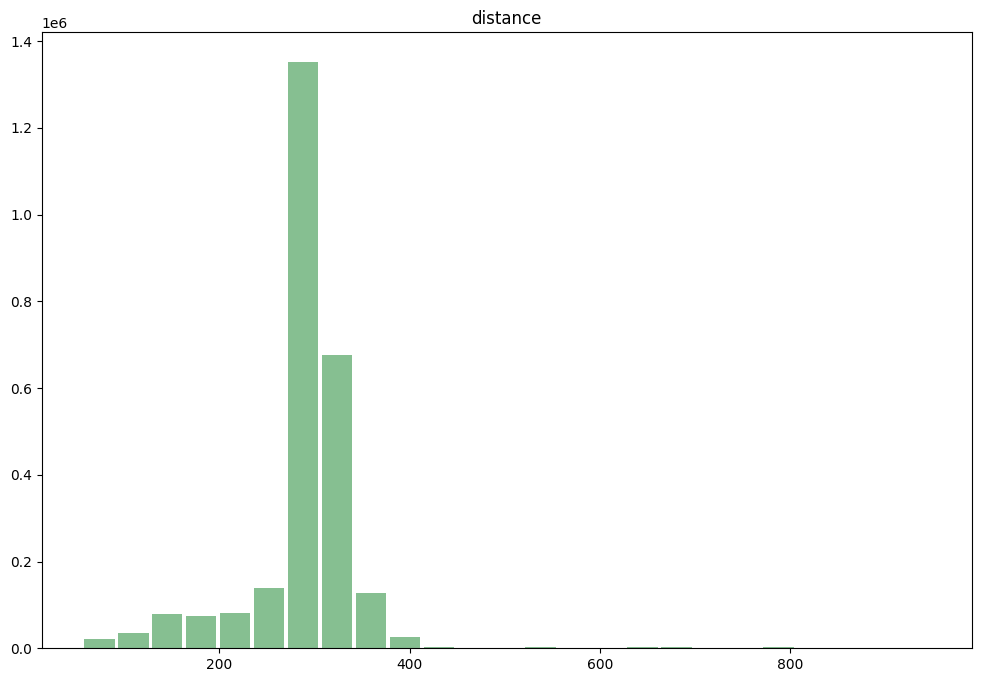

In [12]:
df_distances.hist(column='distance', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [13]:
print(f'Mean: {df_distances["distance"].mean()}')
print(f'Median: {df_distances["distance"].median()}')
print(f'Min: {df_distances["distance"].min()}')
print(f'Max: {df_distances["distance"].max()}')

Mean: 289.3153690923187
Median: 297.0
Min: 56
Max: 948


In [14]:
THRESHOLD = 60

In [45]:
df_distances.loc[df_distances['distance'] > 300]

,patch,seq_id,seq,distance,distance_norm
786,DQRRVVLCWAYHPKPLPMAV,A0A540VL62,MVDSNAKVTLKDVGQQPGHNRDNGFYGQDIISVSQFDRTRLEYIFNVAHEMRVLVERFGSADLLQGKILANLFYEPSTRTSSSFMAAMLRLGGQVIPINNVQYSSVTKGESLPDTVRTLECYADVIVLRHPEVGSAATAARYASKPVINAGDGVGEHPTQALLDHFTIVEELGGVDGLKVAMVGDLKYGRTVHSLTKLLTNYDVEFVFVSPDILRMPEDVLDVVRASGHRFTVTEDVHDVIGEVDVLYVTRVQKERFSDLAEYDRVKDQYVVDPELMQRAKERMIVMHPLPRVNEISYAVDDDPRAAYFRQMRNGMYIRMALLAAVLGRA,311,1
787,ALQDADFVYVKNWSAYEPYG,A0A540VL62,MVDSNAKVTLKDVGQQPGHNRDNGFYGQDIISVSQFDRTRLEYIFNVAHEMRVLVERFGSADLLQGKILANLFYEPSTRTSSSFMAAMLRLGGQVIPINNVQYSSVTKGESLPDTVRTLECYADVIVLRHPEVGSAATAARYASKPVINAGDGVGEHPTQALLDHFTIVEELGGVDGLKVAMVGDLKYGRTVHSLTKLLTNYDVEFVFVSPDILRMPEDVLDVVRASGHRFTVTEDVHDVIGEVDVLYVTRVQKERFSDLAEYDRVKDQYVVDPELMQRAKERMIVMHPLPRVNEISYAVDDDPRAAYFRQMRNGMYIRMALLAAVLGRA,311,1
789,KKFVMSWAYSGSAEKPLAIP,A0A540VL62,MVDSNAKVTLKDVGQQPGHNRDNGFYGQDIISVSQFDRTRLEYIFNVAHEMRVLVERFGSADLLQGKILANLFYEPSTRTSSSFMAAMLRLGGQVIPINNVQYSSVTKGESLPDTVRTLECYADVIVLRHPEVGSAATAARYASKPVINAGDGVGEHPTQALLDHFTIVEELGGVDGLKVAMVGDLKYGRTVHSLTKLLTNYDVEFVFVSPDILRMPEDVLDVVRASGHRFTVTEDVHDVIGEVDVLYVTRVQKERFSDLAEYDRVKDQYVVDPELMQRAKERMIVMHPLPRVNEISYAVDDDPRAAYFRQMRNGMYIRMALLAAVLGRA,311,1
790,TARPKVVMTWAPHPKALPQA,A0A540VL62,MVDSNAKVTLKDVGQQPGHNRDNGFYGQDIISVSQFDRTRLEYIFNVAHEMRVLVERFGSADLLQGKILANLFYEPSTRTSSSFMAAMLRLGGQVIPINNVQYSSVTKGESLPDTVRTLECYADVIVLRHPEVGSAATAARYASKPVINAGDGVGEHPTQALLDHFTIVEELGGVDGLKVAMVGDLKYGRTVHSLTKLLTNYDVEFVFVSPDILRMPEDVLDVVRASGHRFTVTEDVHDVIGEVDVLYVTRVQKERFSDLAEYDRVKDQYVVDPELMQRAKERMIVMHPLPRVNEISYAVDDDPRAAYFRQMRNGMYIRMALLAAVLGRA,312,2
791,IEKPRAVPQS,A0A540VL62,MVDSNAKVTLKDVGQQPGHNRDNGFYGQDIISVSQFDRTRLEYIFNVAHEMRVLVERFGSADLLQGKILANLFYEPSTRTSSSFMAAMLRLGGQVIPINNVQYSSVTKGESLPDTVRTLECYADVIVLRHPEVGSAATAARYASKPVINAGDGVGEHPTQALLDHFTIVEELGGVDGLKVAMVGDLKYGRTVHSLTKLLTNYDVEFVFVSPDILRMPEDVLDVVRASGHRFTVTEDVHDVIGEVDVLYVTRVQKERFSDLAEYDRVKDQYVVDPELMQRAKERMIVMHPLPRVNEISYAVDDDPRAAYFRQMRNGMYIRMALLAAVLGRA,320,0
...,...,...,...,...,...
2628952,AKKYVIMWGY,A6EQZ9,MELSVDHLLGIKYIKEADIQLIFETADHFKEVINRPIKKVPSLRDITIANLFFENSTRTRLSFELAEKRLSADVVNFSAASSSVKKGETLIDTVNNILSMKVDMVVMRHPNPGAGVFLSKHVGAKIINAGDGAHEHPTQALLDSYSIRERLGDVAGKKVVIVGDILHSRVALSNIFALKKLGAEVKVCGPKTLMPKHIESLGVVYEPSLIKALNWCDVANMLRVQNERMDISYFPSTREYTQQYGVNKKILSSLDKEIVLMHPGPINRGVEITSDVADSKQAIILDQVQNGVAVRMAVIYLLASKINRGNVAQ,303,0
2628953,VVLTWAPHIK,A6EQZ9,MELSVDHLLGIKYIKEADIQLIFETADHFKEVINRPIKKVPSLRDITIANLFFENSTRTRLSFELAEKRLSADVVNFSAASSSVKKGETLIDTVNNILSMKVDMVVMRHPNPGAGVFLSKHVGAKIINAGDGAHEHPTQALLDSYSIRERLGDVAGKKVVIVGDILHSRVALSNIFALKKLGAEVKVCGPKTLMPKHIESLGVVYEPSLIKALNWCDVANMLRVQNERMDISYFPSTREYTQQYGVNKKILSSLDKEIVLMHPGPINRGVEITSDVADSKQAIILDQVQNGVAVRMAVIYLLASKINRGNVAQ,303,0
2628956,VVMSWAYAKS,A6EQZ9,MELSVDHLLGIKYIKEADIQLIFETADHFKEVINRPIKKVPSLRDITIANLFFENSTRTRLSFELAEKRLSADVVNFSAASSSVKKGETLIDTVNNILSMKVDMVVMRHPNPGAGVFLSKHVGAKIINAGDGAHEHPTQALLDSYSIRERLGDVAGKKVVIVGDILHSRVALSNIFALKKLGAEVKVCGPKTLMPKHIESLGVVYEPSLIKALNWCDVANMLRVQNERMDISYFPSTREYTQQYGVNKKILSSLDKEIVLMHPGPINRGVEITSDVADSKQAIILDQVQNGVAVRMAVIYLLASKINRGNVAQ,303,0
2628961,KFLQVWGKGA,A6EQZ9,MELSVDHLLGIKYIKEADIQLIFETADHFKEVINRPIKKVPSLRDITIANLFFENSTRTRLSFELAEKRLSADVVNFSAASSSVKKGETLIDTVNNILSMKVDMVVMRHPNPGAGVFLSKHVGAKIINAGDGAHEHPTQALLDSYSIRERLGDVAGKKVVIVGDILHSRVALSNIFALKKLGAEVKVCGPKTLMPKHIESLGVVYEPSLIKALNWCDVANMLRVQNERMDISYFPSTREYTQQYGVNKKILSSLDKEIVLMHPGPINRGVEITSDVADSKQAIILDQVQNGVAVRMAVIYLLASKINRGNVAQ,303,0


In [15]:
df_distances.loc[df_distances['distance'] < THRESHOLD]

,patch,seq_id,seq,distance
634313,VLADMMTIQERFGNPRKLKVAISWAYATSHAKPLSVPQSQ,A0A059TRK4,MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA,59
634317,IREKLGTFEHQRVVLSWAYHPKPLPMAVPNSFALIAAQLG,A0A059TRK4,MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA,57
634322,LADAAAITETLGDPRGKKLVLSWAPHPKALPQAVPNSALL,A0A059TRK4,MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA,59
634333,HEFGGVENLKGKKLAMTWAYSPSYGKPLSVPQGVIGLMTR,A0A059TRK4,MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA,59
634336,DLLHLKTYFGSLEKLKGKKIAMTWAYSPSYGKPLSVPQGI,A0A059TRK4,MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA,59
634345,QGLADALTLRERLGDPRGRKFVLQWAWHPKALPTAVPASA,A0A059TRK4,MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA,56
634375,LHMIHEFGGVENLRGKKVAMTWAYSPSYGKPLSVPQGVIG,A0A059TRK4,MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA,59
634428,LADLYTFREKFGKVEGKKYVIMWAYSPEIRGWCSVQEDLI,A0A059TRK4,MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA,59
634451,GKQVVVSWGFGSNFANPAVAHGLITTSALAGAHVRIVEPP,A0A059TRK4,MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA,57
634476,DLMTIEEVFGTRDLSGMKVCVSWAYAPSYAKPMSVPQGLA,A0A059TRK4,MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA,59


In [16]:
set(df_distances.loc[df_distances['distance'] < THRESHOLD]['seq_id'].tolist())

{'A0A059TRK4', 'A0A7Y5VAZ4'}

In [17]:
set(df_distances.loc[df_distances['distance'] < THRESHOLD]['patch'].tolist())

{'ADAMTIREKLSGFRGERVVLTWAYHPKPLPMAVPNSFALI',
 'ADLLTLKEFLGGNLKGKKFVMSWAYSGSAEKPLAIPQSAV',
 'AHIQALREHLGADLTGRKYVLTWTYHPKPLNTAVANSALL',
 'CQALADWKTMDDVGVPRGGRFVLSWVYHPRALPLAVPAAA',
 'CQALGDWKAMDDLGIPANGRLVLTWANHPRPLPLAVPAAV',
 'DLLHLKTYFGSLEKLKGKKIAMTWAYSPSYGKPLSVPQGI',
 'DLLHLVHEFGGLENLRGRKLAMSWAYSPSYGKPLSVPQGM',
 'DLMTIEEVFGTRDLSGMKVCVSWAYAPSYAKPMSVPQGLA',
 'GKKFVISWTSAGKYMRPLSMAHSLVALMPRFGLDVTLAHP',
 'GKQVVVSWGFGSNFANPAVAHGLITTSALAGAHVRIVEPP',
 'GLADIMGLRKHLGKNLKGKKLLLYWGHGALARSWCSVQEA',
 'GLADWLTIEEKLGAPRGRRFVLSWAPQARAVPMAVPHSAV',
 'GYLFPIFQRLGELQNRDIVISWAFDNRFSLPSVPQSLLLL',
 'HEFGGIENLKGKKVAMTWAYSPSYGKPLSVPQGIVGLMTR',
 'HEFGGVENLKGKKLAMTWAYSPSYGKPLSVPQGVIGLMTR',
 'HLIHEFGGSENLKGKKIAMTWAYSPSYGKPLSVPQGVIGL',
 'IREKLGTFEHQRVVLSWAYHPKPLPMAVPNSFALIAAQLG',
 'KGDLRRCKVAFLWGYRAANPPAGLTNSTMLMAGKIGFDLT',
 'KGPVQKSKLAFLWGYRKANPPAGLTNSAMLMAGKLGFDID',
 'LADAAAITETLGDPRGKKLVLSWAPHPKALPQAVPNSALL',
 'LADLYTFREKFGKVEGKKYVIMWAYSPEIRGWCSVQEDLI',
 'LAHALALREHFGTEDLRGRKYVLTWTWHPKALNTAVANSA',
 'LHLKKMFG